# Banking Transaction Log
### Problem Statement:
    Perform cleaning and exploratory analysis on banking transactions. Fill missing transaction types, analyze daily transactions, and flag suspicious patterns (e.g., high withdrawal amount).
    Key Tools: .duplicated(), .cumsum(), .resample(), .rolling(), np.where(), .sort_values()

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_csv('banking_transactions.csv')
df = df.copy()
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai
1,30002,158767,2023-06-02,NaN,7500.0,Delhi
2,30003,186522,2023-06-03,NaN,1000.0,Bangalore
3,30004,378346,2023-06-04,NaN,NaN,NaN
4,30005,463410,2023-06-05,Transfer,7500.0,NaN
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore
6,30007,161371,2023-06-07,NaN,10000.0,Mumbai
7,30008,218405,2023-06-08,NaN,10000.0,Delhi
8,30009,370480,2023-06-09,Credit,NaN,Mumbai
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai


In [14]:
df.isnull().sum()

Transaction_ID       0
Account_Number       0
Transaction_Date     0
Transaction_Type    17
Amount              11
Location            13
dtype: int64

In [15]:
df['Location'] = df['Location'].ffill()

In [16]:
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai
1,30002,158767,2023-06-02,NaN,7500.0,Delhi
2,30003,186522,2023-06-03,NaN,1000.0,Bangalore
3,30004,378346,2023-06-04,NaN,NaN,Bangalore
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore
6,30007,161371,2023-06-07,NaN,10000.0,Mumbai
7,30008,218405,2023-06-08,NaN,10000.0,Delhi
8,30009,370480,2023-06-09,Credit,NaN,Mumbai
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai


In [17]:
df.fillna({'Amount':df['Amount'].mean().round()}, inplace=True)

In [18]:
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai
1,30002,158767,2023-06-02,NaN,7500.0,Delhi
2,30003,186522,2023-06-03,NaN,1000.0,Bangalore
3,30004,378346,2023-06-04,NaN,5564.0,Bangalore
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore
6,30007,161371,2023-06-07,NaN,10000.0,Mumbai
7,30008,218405,2023-06-08,NaN,10000.0,Delhi
8,30009,370480,2023-06-09,Credit,5564.0,Mumbai
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai


In [19]:
df.isnull().sum()

Transaction_ID       0
Account_Number       0
Transaction_Date     0
Transaction_Type    17
Amount               0
Location             0
dtype: int64

In [20]:
df.fillna({'Transaction_Type':'Unknown'}, inplace = True)

In [21]:
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai
1,30002,158767,2023-06-02,Unknown,7500.0,Delhi
2,30003,186522,2023-06-03,Unknown,1000.0,Bangalore
3,30004,378346,2023-06-04,Unknown,5564.0,Bangalore
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore
6,30007,161371,2023-06-07,Unknown,10000.0,Mumbai
7,30008,218405,2023-06-08,Unknown,10000.0,Delhi
8,30009,370480,2023-06-09,Credit,5564.0,Mumbai
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai


In [22]:
df.isnull().sum()

Transaction_ID      0
Account_Number      0
Transaction_Date    0
Transaction_Type    0
Amount              0
Location            0
dtype: int64

In [44]:
df.to_csv('cleaned_banking_data.csv', index=False)

# INSIGHTS

In [54]:
df_new = pd.read_csv('cleaned_banking_data.csv')
df = df_new.copy()
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai
1,30002,158767,2023-06-02,Unknown,7500.0,Delhi
2,30003,186522,2023-06-03,Unknown,1000.0,Bangalore
3,30004,378346,2023-06-04,Unknown,5564.0,Bangalore
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore
6,30007,161371,2023-06-07,Unknown,10000.0,Mumbai
7,30008,218405,2023-06-08,Unknown,10000.0,Delhi
8,30009,370480,2023-06-09,Credit,5564.0,Mumbai
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_ID    50 non-null     int64  
 1   Account_Number    50 non-null     int64  
 2   Transaction_Date  50 non-null     object 
 3   Transaction_Type  50 non-null     object 
 4   Amount            50 non-null     float64
 5   Location          50 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [58]:
df['Transaction_Date'] = pd.to_datetime(df['Transaction_Date'], format='%Y-%m-%d')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    50 non-null     int64         
 1   Account_Number    50 non-null     int64         
 2   Transaction_Date  50 non-null     datetime64[ns]
 3   Transaction_Type  50 non-null     object        
 4   Amount            50 non-null     float64       
 5   Location          50 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 2.5+ KB


In [5]:
df.describe()

,Transaction_ID,Account_Number,Amount
count,50.00000,50.000000,50.000000
mean,30025.50000,550033.480000,5564.080000
std,14.57738,225342.907408,2718.379408
min,30001.00000,158767.000000,1000.000000
25%,30013.25000,378034.750000,5000.000000
50%,30025.50000,577018.000000,5564.000000
75%,30037.75000,716748.250000,7500.000000
max,30050.00000,977500.000000,10000.000000


### 1. Data Selection & Filtering:
Filter transactions above ₹5000 and only include Debit or Transfer types.

In [14]:
df.query("Amount > 5000 and Transaction_Type == ['Debit','Transfer']")

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore
10,30011,638208,2023-06-11,Debit,5564.0,Bangalore
13,30014,693644,2023-06-14,Debit,10000.0,Mumbai
17,30018,717240,2023-06-18,Transfer,7500.0,Hyderabad
20,30021,402925,2023-06-21,Transfer,5564.0,Delhi
22,30023,257700,2023-06-23,Transfer,7500.0,Mumbai
25,30026,525027,2023-06-26,Debit,7500.0,Delhi
26,30027,426818,2023-06-27,Transfer,7500.0,Bangalore
28,30029,579054,2023-06-29,Debit,7500.0,Bangalore


### 2. Data Transformation:
1. Create a column Transaction_Month.
2. Flag high-value transactions (Amount > 7000).

In [60]:
df['Month_Name'] = df['Transaction_Date'].dt.month_name()

In [61]:
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location,Month_Name
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai,June
1,30002,158767,2023-06-02,Unknown,7500.0,Delhi,June
2,30003,186522,2023-06-03,Unknown,1000.0,Bangalore,June
3,30004,378346,2023-06-04,Unknown,5564.0,Bangalore,June
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore,June
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore,June
6,30007,161371,2023-06-07,Unknown,10000.0,Mumbai,June
7,30008,218405,2023-06-08,Unknown,10000.0,Delhi,June
8,30009,370480,2023-06-09,Credit,5564.0,Mumbai,June
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai,June


In [64]:
df['High_Value_Transactions'] = np.where(df['Amount'] > 7000, 'High','Normal')

In [65]:
df

,Transaction_ID,Account_Number,Transaction_Date,Transaction_Type,Amount,Location,Month_Name,High_Value_Transactions
0,30001,459741,2023-06-01,Debit,10000.0,Mumbai,June,High
1,30002,158767,2023-06-02,Unknown,7500.0,Delhi,June,High
2,30003,186522,2023-06-03,Unknown,1000.0,Bangalore,June,Normal
3,30004,378346,2023-06-04,Unknown,5564.0,Bangalore,June,Normal
4,30005,463410,2023-06-05,Transfer,7500.0,Bangalore,June,High
5,30006,559934,2023-06-06,Debit,2500.0,Bangalore,June,Normal
6,30007,161371,2023-06-07,Unknown,10000.0,Mumbai,June,High
7,30008,218405,2023-06-08,Unknown,10000.0,Delhi,June,High
8,30009,370480,2023-06-09,Credit,5564.0,Mumbai,June,Normal
9,30010,790015,2023-06-10,Credit,5000.0,Mumbai,June,Normal


### 3. Melt & Pivot:
1. Melt Amount and Transaction_Type to analyze over locations.
2. Pivot table to show average Amount per Transaction_Type and Location.

In [66]:
melted_df = df.melt(id_vars=["Transaction_ID"], value_vars=["Amount", "Transaction_Type", "Location"], var_name="Categories", value_name="Values")

In [69]:
melted_df.sort_values(by='Transaction_ID').reset_index(drop=True)

,Transaction_ID,Categories,Values
0,30001,Amount,10000.0
1,30001,Transaction_Type,Debit
2,30001,Location,Mumbai
3,30002,Transaction_Type,Unknown
4,30002,Location,Delhi
...,...,...,...
145,30049,Transaction_Type,Unknown
146,30049,Amount,1000.0
147,30050,Amount,1000.0
148,30050,Transaction_Type,Credit


### 4. Aggregation & Grouping:
1. Group by Transaction_Type and calculate total transaction amounts.
2. Find number of transactions per month.

In [70]:
df.groupby('Transaction_Type')['Amount'].sum()

Transaction_Type
Credit      69820.0
Debit       59192.0
Transfer    65564.0
Unknown     83628.0
Name: Amount, dtype: float64

In [77]:
df.groupby('Month_Name')['Transaction_Type'].value_counts()

Month_Name  Transaction_Type
July        Unknown             9
            Credit              6
            Transfer            3
            Debit               2
June        Credit              8
            Unknown             8
            Debit               7
            Transfer            7
Name: count, dtype: int64

In [78]:
df.groupby('Month_Name')['Transaction_Type'].count()

Month_Name
July    20
June    30
Name: Transaction_Type, dtype: int64

# DATA VISUALIZATION

### Objective:
Uncover transaction patterns by type, location, and value segments.
### Visualization Tasks:
1. Pie chart of Transaction_Type distribution.
2. Time series line chart for total transaction volume per day/month.
3. Bar plot of average transaction amount per location.
4. Boxplot comparing transaction amounts across types.
5. Heatmap of transaction frequency by type and location.
6. Histogram of transaction amount distribution.

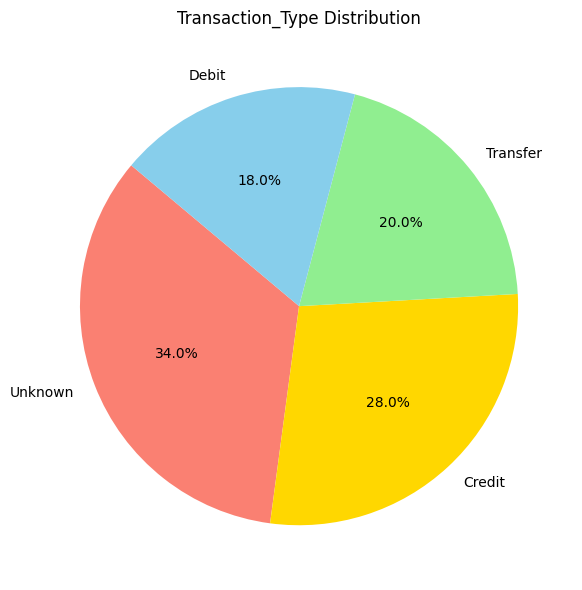

In [86]:
# Pie chart of Transaction_Type distribution.

transaction_counts = df['Transaction_Type'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(
    transaction_counts,
    labels=transaction_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['salmon', 'gold', 'lightgreen', 'skyblue']
)

plt.title("Transaction_Type Distribution")
plt.tight_layout()

### 1. Unknown transactions: 34% — highest proportion, indicating data gaps needing cleanup.
### 2. Credit transactions: 28% — most common known type, suggesting frequent inflows.
### 3. Transfer transactions: 20% — moderate usage, likely for internal account movements.
### 4. Debit transactions: 18% — least frequent, indicating lower direct spending activity.
### 5. Observation: 34% (over one-third) of transactions are unclassified, impacting reporting accuracy and requiring immediate attention.

(array([19509., 19516., 19523., 19530., 19539., 19546., 19553., 19560.]),
 [Text(19509.0, 0, '2023-06-01'),
  Text(19516.0, 0, '2023-06-08'),
  Text(19523.0, 0, '2023-06-15'),
  Text(19530.0, 0, '2023-06-22'),
  Text(19539.0, 0, '2023-07-01'),
  Text(19546.0, 0, '2023-07-08'),
  Text(19553.0, 0, '2023-07-15'),
  Text(19560.0, 0, '2023-07-22')])

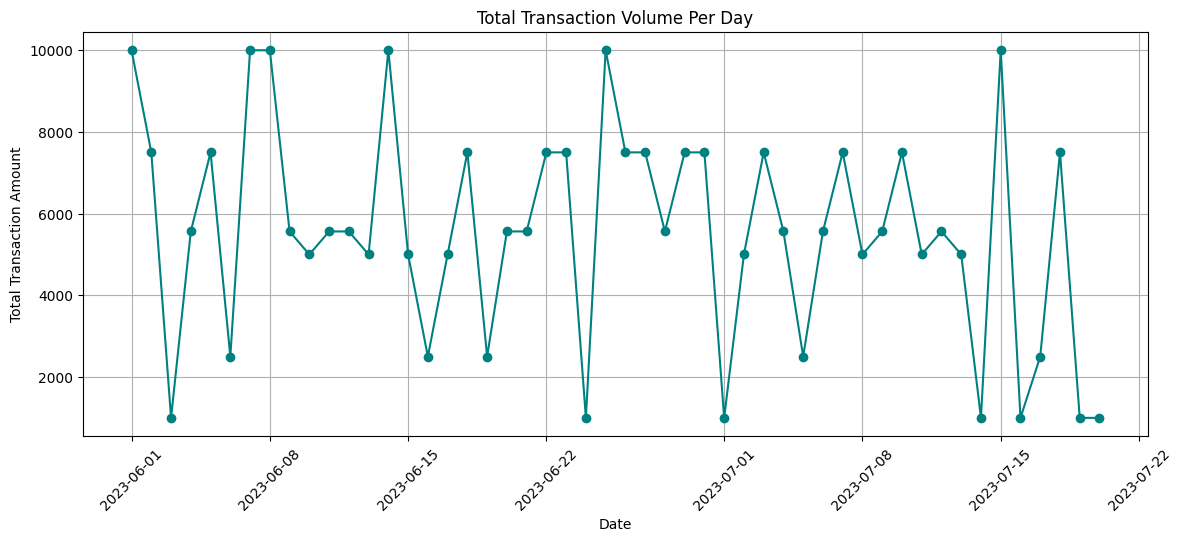

In [91]:
# Time series line chart for total transaction volume per day/month.

daily_volume = df.groupby('Transaction_Date')['Amount'].sum().reset_index()

plt.figure(figsize=(12, 5))
plt.plot(daily_volume['Transaction_Date'], daily_volume['Amount'], marker='o', linestyle='-', color='teal')
plt.title("Total Transaction Volume Per Day")
plt.xlabel("Date")
plt.ylabel("Total Transaction Amount")
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)

### 1. Peak transaction value reached ₹10,000 on at least 4 days — including June 1, June 6, June 13, and July 14.
### 2. Low transaction volume (~₹1,000) occurred on at least 5 days, e.g., June 3, June 24, July 1, July 15, and July 17.
### 3. Most daily transaction volumes ranged between ₹5,000 and ₹7,500, indicating stable activity.
### 4. The range of daily values fluctuated between ₹1,000 and ₹10,000, showing high volatility.
### 5. The most volatile period was from June 13 to July 3, with frequent sharp rises and drops in volume.

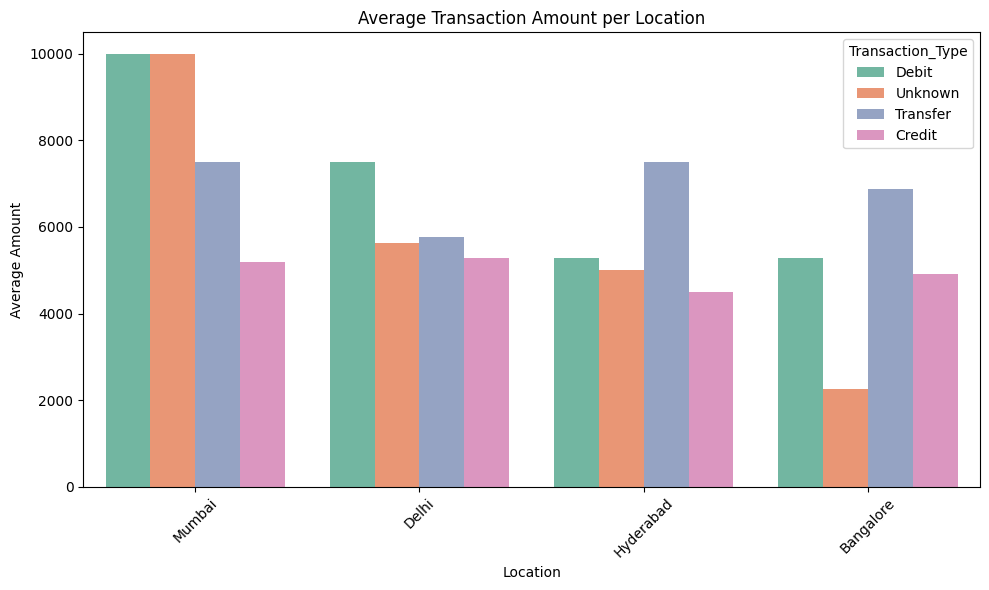

In [100]:
avg_amount_by_location = df.groupby(['Location','Transaction_Type'])['Amount'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Location', y='Amount', hue='Transaction_Type', data=avg_amount_by_location, palette='Set2')

plt.title("Average Transaction Amount per Location")
plt.xlabel("Location")
plt.ylabel("Average Amount")
plt.xticks(rotation=45)
plt.tight_layout()

### 1. Mumbai has the highest average for both Debit and Unknown transactions — each at ₹10,000, indicating large transaction values or high-value clients.
### 2. Transfer transactions are most consistent and highest in Hyderabad (₹7,500) and Mumbai (₹7,500), showing high peer/account movement activity.
### 3. Delhi shows a strong Debit average of ₹7,500, while other transaction types are lower (Unknown: ₹5,600, Transfer: ₹5,800, Credit: ₹5,300).
### 4. Bangalore has the lowest Unknown transaction average at just ₹2,300, while Transfer transactions remain relatively strong at ₹6,900.
### 5. Credit transactions across all locations are relatively lower than other types, peaking only around ₹5,200 (Mumbai) and dropping to ₹4,500 in Hyderabad.

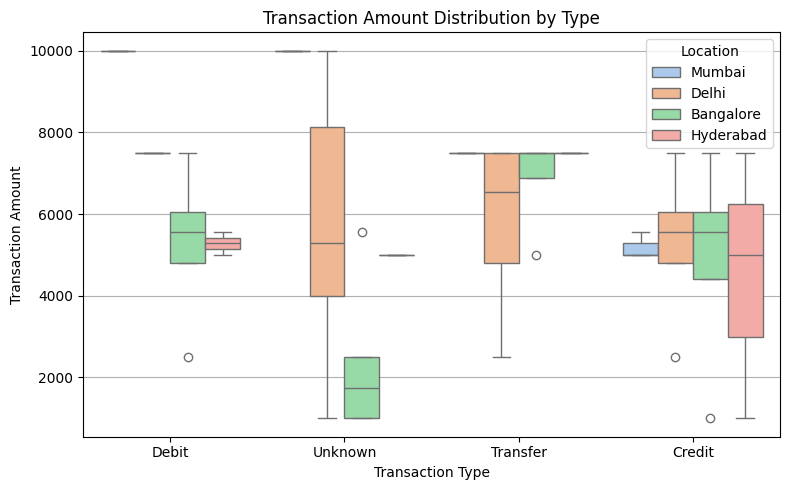

In [105]:
# Boxplot comparing transaction amounts across types.

plt.figure(figsize=(8, 5))
sns.boxplot(x='Transaction_Type', y='Amount', hue='Location', data=df, palette='pastel')

plt.title("Transaction Amount Distribution by Type")
plt.xlabel("Transaction Type")
plt.ylabel("Transaction Amount")
plt.grid(axis='y')
plt.tight_layout()

### Debit Transactions:
1. Mumbai: Consistently high, around ₹10,000.
2. Delhi: Ranges from ₹4,000 to ₹7,500.
3. Bangalore: Mostly between ₹2,500 and ₹6,000.
4. Hyderabad: Narrow range around ₹5,000–₹5,500.

### Unknown Transactions:
1. Delhi: Broadest range, from ₹1,000 to ₹10,000.
2. Bangalore: Lower range, mostly ₹1,000 to ₹2,500.
3. Other cities show moderate variation, with values between ₹4,000 and ₹8,000.

### Transfer Transactions:
1. Consistently distributed across all locations from ₹5,000 to ₹7,500.
2. Minimal variance, indicating uniform behavior.

### Credit Transactions:
1. Hyderabad: Wide range from ₹3,000 to ₹7,500.
2. Mumbai & Delhi: Concentrated between ₹5,000 and ₹6,000.
3. Bangalore: Slightly more spread, includes low outliers (~₹1,000).

### Outliers:
Found mostly in Unknown and Credit types, especially in Delhi and Bangalore, suggesting irregular high/low value transactions.

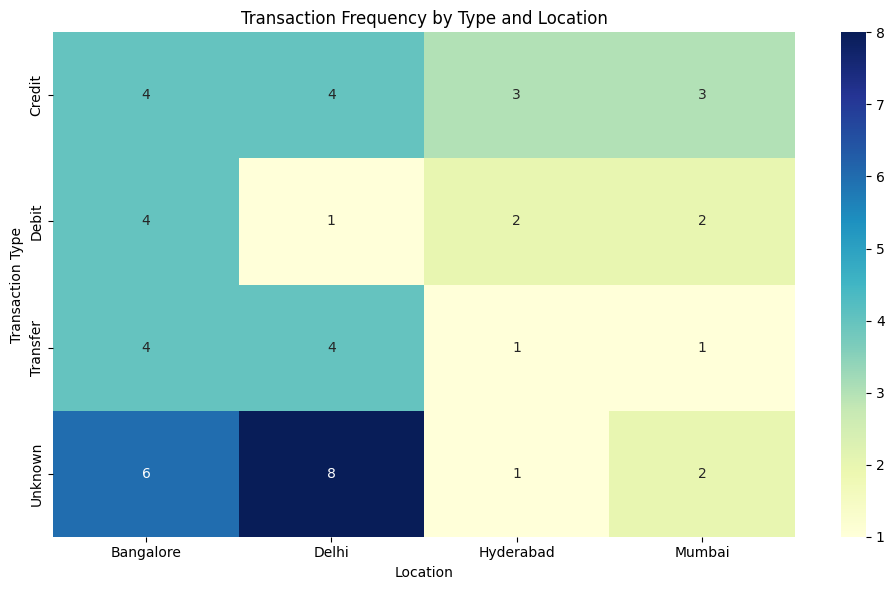

In [107]:
# Heatmap of transaction frequency by type and location.

transaction_matrix = pd.crosstab(df['Transaction_Type'], df['Location'])

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(transaction_matrix, annot=True, fmt='d', cmap='YlGnBu')

plt.title("Transaction Frequency by Type and Location")
plt.xlabel("Location")
plt.ylabel("Transaction Type")
plt.tight_layout()

### 1. Bangalore: Highest total (18) with balanced Credit, Debit, Transfer (all 4), and high Unknown (6).
### 2. Delhi: Total 17; highest Unknown (8) and strong Credit/Transfer (4 each); very low Debit (1).
### 3. Mumbai: Total 8; moderate Credit (3), low Debit/Transfer (2, 1), Unknown (2).
### 4. Hyderabad: Lowest total (7); minimal across all types – Credit (3), others only 1.

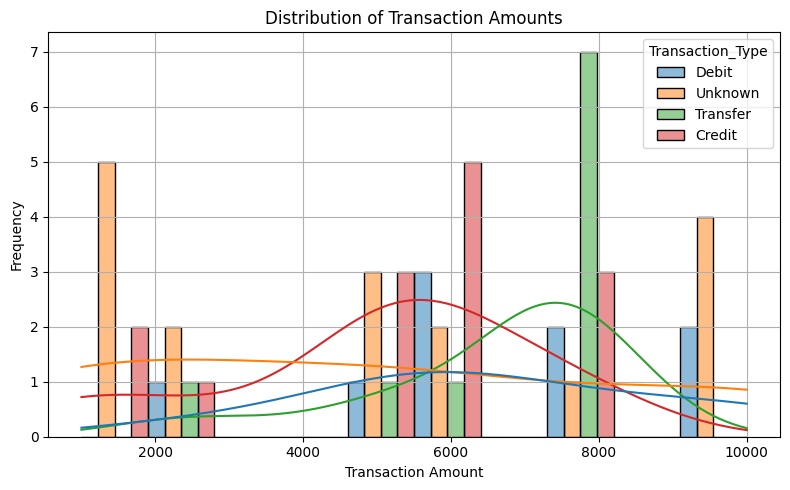

In [128]:
# Histogram of transaction amount distribution.

plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Amount', hue='Transaction_Type', bins=10, kde=True, multiple='dodge')


plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()

### Unknown Transactions
1. Most frequent at low amounts (₹1000–₹3000)
2. Irregular spikes, including at ₹9500
3. Indicates inconsistent patterns — likely data quality or classification issues

### Debit Transactions
1. Spread evenly from ₹2000 to ₹10000
2. Slight concentration around ₹5000–₹6000
3. Suggests debit is used across a wide range of amounts

### Transfer Transactions
1. Strong peak at ₹8000
2. Very few low-value entries
3. Indicates transfer is preferred for high-value payments

### Credit Transactions
1. Bell-shaped curve centered around ₹6000
2. Most values fall in ₹5000–₹7000 range
3. Shows consistent usage pattern for moderate-value credits